# Getting Started With FKB

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from IPython.display import SVG
from keras.utils import model_to_dot
from tensorflow import set_random_seed

Using TensorFlow backend.


In [3]:
# set random seeds
np.random.seed(123); set_random_seed(123)

### Build Keras Model
FKB [supported model types](https://github.com/scientific-computing/FKB/tree/master/KerasWeightsProcessing#supported-models)

In [4]:
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2,  activation='linear'))

model.compile(loss='mse', optimizer='SGD')

### Visualize the model

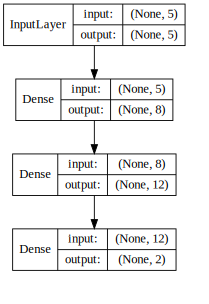

In [5]:
SVG(model_to_dot(model, show_shapes= True, show_layer_names=False, dpi=65).create(prog='dot', format='svg'))

### Save the model to file

In [6]:
model.save('getting_started_model.h5')

### Convert to Fortran Acceptable Config

In [7]:
from KerasWeightsProcessing.convert_weights import txt_to_h5, h5_to_txt

In [8]:
h5_to_txt(
    weights_file_name='getting_started_model.h5', 
    output_file_name='getting_started_model.txt'
)

### Examine the Fortran Config File
[Documentation](https://github.com/scientific-computing/FKB/tree/master/KerasWeightsProcessing#format-of-the-txt-file) for the config file fromat

In [9]:
!cat getting_started_model.txt

7
input	5
dense	8
relu	0
dense	12
relu	0
dense	2
linear	0
0.009999999776482582
0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00
0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00	0.0000000e+00
0.0000000e+00	0.0000000e+00
-4.8925596e-01	5.5228937e-01	-5.9026456e-01	-5.8673549e-01	-1.1316413e-01	-5.3596359e-01	-1.3628745e-01	5.7868993e-01	-5.6312466e-01	-1.6657311e-01	5.5376709e-01	9.3283951e-02	3.0819613e-01	1.3606751e-01	7.4575841e-02	6.6046178e-02	-1.2762833e-01	4.5480883e-01	4.5791590e-01	5.6096792e-01	-4.9174094e-01	-2.8221378e-01	-6.2307608e-01	-2.3888716e-01	1.3567424e-01	6.5321004e-01	-5.0579786e-02	2.6826042e-01	3.0757529e-01	3.7237585e-01	-4.5867616e-01	-4.4614393e-01	4.0070748e-01	-1.6273969e-01	1.1666548e-01	2.9404122e-01	-5.0823128e-01	-6.5129656e-01	4.1201031e-01	5.6093168e-01
4.0553868e-02	9.6573949e-02	-3.389

### Compile FKB

In [10]:
!sh build_steps.sh

-- The Fortran compiler identification is GNU 7.5.0
-- Check for working Fortran compiler: /usr/bin/gfortran
-- Check for working Fortran compiler: /usr/bin/gfortran  -- works
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Checking whether /usr/bin/gfortran supports Fortran 90
-- Checking whether /usr/bin/gfortran supports Fortran 90 -- yes
-- Configuring build for 32-bit integers
-- Configuring build for 32-bit reals
-- Configuring build for serial execution
-- Configuring to build with -fcoarray=single
-- Configuring done
-- Generating done
-- Build files have been written to: /home/jordan/Desktop/FKB/build
Scanning dependencies of target neural
[  4%] Building Fortran object CMakeFiles/neural.dir/src/lib/mod_kinds.F90.o
[  8%] Building Fortran object CMakeFiles/neural.dir/src/lib/mod_activation.F90.o
[ 13%] Building Fortran object CMakeFiles/neural.dir/src/lib/mod_layer.F90.o
[ 17%] Building Fortran object CMakeFiles/neural.dir/src/lib/mod_ba

### Run the Fortran Network

In [11]:
!build/bin/./test_keras getting_started_model.txt 

 -0.434864998     -0.801291883    


### Run the same input through the Keras network

In [12]:
model.predict(np.array([1,2,3,4,5]).reshape(1,5))

array([[-0.43486497, -0.80129194]], dtype=float32)